<a href="https://colab.research.google.com/github/JPDaub/MasterLAB-MLwR/blob/master/FINAL_MLwR_Summary_Chapter_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 8: Finding Patterns - Market Basket Analysis Using Association Rules
Machine Learning with R - Brett Lantz 

---
Impulse purchases are often no coincidence as retailers use refined techniques to analyze customer buying behavior. Using this example, Chapter 8 describes and explains how machine learning algorithms are able to search for purchasing patterns of retail customers using barcode scanners, inventory databases and online shopping cards. This search is commonly referred to as market basket analysis. 


## Theoretical basics
This part aims to provide the reader with an theoretical understanding of the underlying concepts of market basket analysis.
### Understanding association rules
The goal of market basket analyses is the generation of association rules which enumerate patterns within the relationship among (purchased) items. An itemset is a group of one or more items in a single transaction and is denoted as follows: 
> {bread, peanut butter, jelly}.

Resulting from this, the denotation of association rules is

> {peanut butter,jelly} → {bread}.

The left-hand-side (LHS) is the condition that has to be met in order to trigger the rule and the right-hand-side (RHS) is the expected result of meeting that condition.  

A common approach to assess association rules is dividing them up into three categories: actionable, trivial, and inexplicable. Actionable rules are clearly formulated and provide meaningful insight. Trivial rules are clear but are not worth consideration as they provide only negligible information. The last category, inexplicable rules, are characterized by unclear relationships between items.

Association rules are unsupervised learners which means that there is no need for the algorithm to be trained as it only finds interesting patterns in the dataset. Furthermore, they are used for knowledge discovery in large datasets rather than predictions. The foremost downside of association rules is the absence of an objective way to measure performance rule learner. 

### The apriori algorithm
The datasets used for market basket analyses are almost always large. The number of potential itemsets grows exponentially with the number of features. The apriori algorithm constitutes a solution for this dilemma as the algorithm utilizes a simple prior belief about the properties of frequent itemsets. The apriori property suggests that all subsets of a frequent itemset must also be frequent: If either {motor oil} or {lipstick} or both are considered infrequent the itemset {motor oil, lipstick} is eliminated as well. This approach reduces the number of rules for which the algorithm searches.

The algorithm uses statistical measures, namely support, confidence and lift, of an itemset to define a minimum threshold and to locate association rules. The **support** of an itemset answers the question of how frequently an itemset or rule occur in the data. 
A rule’s **confidence** is the measurement of its predictive power/accuracy and is defined with the following formula: 

> confidence (X→Y)=(support(X,Y))/(support(X)).

Important is that the confidence that X leads to Y is not the same as confidence that Y leads to X. Strong association rules have both high support and high confidence. 
The metric **lift** measures how much more likely one item or itemset is to be purchased relative to its typical rate of purchase, given that you know another item or itemset has been purchased. The according formula is:

> lift(X→Y)=(confidence(X→Y))/(support (Y)).

The procedure of the apriori algorithm is as follows:

1.   The algorithm identifies all itemsets that meet the minimum support threshold applying multiple iterations with increasing size of itemsets.
2.   Then, the algorithm creates rules from these itemsets using those meeting the minimums confidence threshold.

## Example - identifying frequently purchased groceries with association rules

###Step 1: Collecting data
The dataset comprises of 9835 transactions and has is based on the fundamental assumption that only one specific brand per product is offered. 

###Step 2: Exploring and preparing the data
The transactional data used in this chapter differs from the one used in previous chapters. The dataset is comprised of comma-separated lists of varying number of items purchased in each transaction. Instead of using a conventional matrix where each row has the same set of features a sparse matrix is used. Each row of the latter contains a transaction and runs through as many columns as there are possible items in the shopping bag. As not every customer buys all product types, some cells doesn’t contain values. This characteristic makes sparse matrices memory efficient as only occupied cells are saved. 

In [0]:
install.packages('arules', repos='http://cran.rstudio.com/')
library(arules)
groceries <- read.transactions("https://raw.githubusercontent.com/JPDaub/MasterLAB-MLwR/master/groceries.csv", sep = ",")
summary(groceries)
inspect(groceries[1:5])
itemFrequency(groceries[, 1:3])

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
            labels
1 abrasive cleaner
2 artif. sweetener
3   baby cosmetics

    items                     
[1] {citrus fruit,            
     margarine,               
     ready soups,             
     semi-finished bread}     
[2] {coffee,                  
     tropical fruit,          
     yogurt}                  
[3] {whole milk}              
[4] {cream cheese,            
     meat spreads,            
     pip fruit,               
     yogurt}                  
[5] {condensed milk,          
     long life bakery product,
     other vegetables,        
     whole milk}              


abrasive cleaner artif. sweetener   baby cosmetics 
    0.0035587189     0.0032536858     0.0006100661

The `arules`-package (derived from association rules) includes useful features and is integral for this machine learning exercise. The `summary()` command displays basic information about the dataset. The block summarizes the sparse matrix. This dataset contains of 9835 rows (transactions) and 169 columns (items that could appear in a shopping bag). The density indicates the proportion of non-zero cells. The second block shows the most frequent items occurring in the dataset. The last block displays basic statistics about the size of the transaction, including how often each transaction size occurs, minimum and maximum values as well as the quartiles.The `inspect()` function can be used to have a look at the first 5 transactions and the `itemFrequency()` displays the proportion of transaction that contain either of the first three items in alphabetical order.

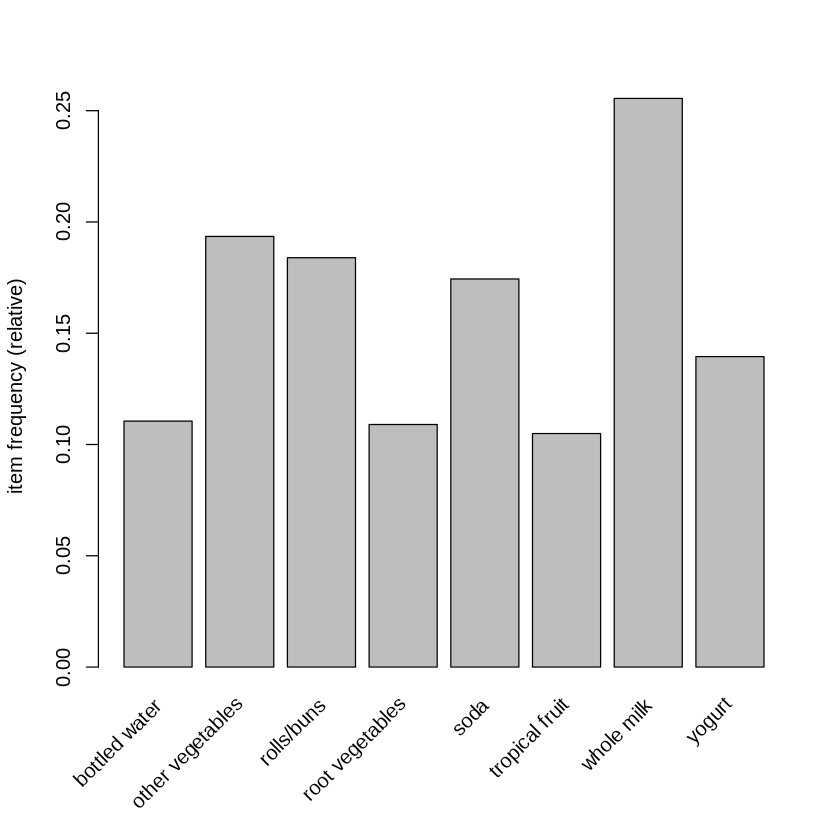

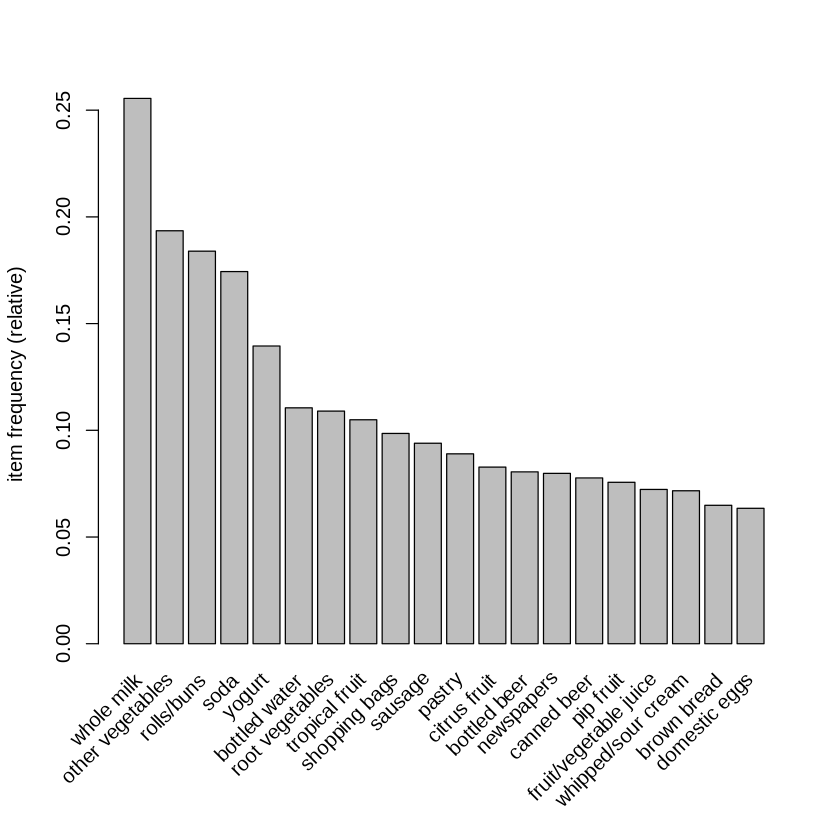

In [0]:
itemFrequencyPlot(groceries, support = 0.1)
itemFrequencyPlot(groceries, topN = 20)

The `image()` function provides the user with a visualization of the entire sparse matrix from an bird’s eye perspective. The first specification reduces the picture to the first 5 transactions whereas the second one depicts 100 randomly selected transactions. A significant disadvantage of this form of visualization is the difficulty reading the output. However, this image provides the reader with an valuable overview of the transaction data.

###Step 3: training a model on the data
This step contains the search for associations among the item and itemsets using the Apriori-algorithm implemented in the arules-package. 

In [0]:
apriori(groceries)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 983 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 0 rules 

Using the default settings of the `apriori()` function (`support` = 0.1, `confidence` = 0.8) results with zero rules which is not surprising as the support level is too high for the underlying dataset. 

In [0]:
groceryrules <- apriori(groceries, parameter = list(support =
                          0.006, confidence = 0.25, minlen = 2))
groceryrules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.25    0.1    1 none FALSE            TRUE       5   0.006      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [109 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [463 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 463 rules 

Using the `apriori()` function with this parameter-lists results in a set of 463 rules. The first block of the formula is the dataset `groceries`. As multiple parameters are used, they are defined as a list. To find the right parameters a process of trial and error is needed. The minimum `support` level, which displays the smallest number of transactions needed to find a pattern worth consideration, is 0.006 (two purchases per day and approximately 60 purchases per month). Using a suitable level of `confidence` is equally important. If the threshold is too high, only few and often obvious rules will be found. Setting the threshold too low will result in too many unreliable rules. Using a level of 0.25 means that only rules will be considered that are correct at least 25% of the time. The `minlen` parameter deletes all rules with fewer than 2 items eliminating uninteresting rules. 

###Step 4: Evaluating model performance
Before starting with the evaluation a high-level overview of the rules is useful. 

In [0]:
summary(groceryrules)
inspect(groceryrules[1:3])

set of 463 rules

rule length distribution (lhs + rhs):sizes
  2   3   4 
150 297  16 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.711   3.000   4.000 

summary of quality measures:
    support           confidence          lift            count      
 Min.   :0.006101   Min.   :0.2500   Min.   :0.9932   Min.   : 60.0  
 1st Qu.:0.007117   1st Qu.:0.2971   1st Qu.:1.6229   1st Qu.: 70.0  
 Median :0.008744   Median :0.3554   Median :1.9332   Median : 86.0  
 Mean   :0.011539   Mean   :0.3786   Mean   :2.0351   Mean   :113.5  
 3rd Qu.:0.012303   3rd Qu.:0.4495   3rd Qu.:2.3565   3rd Qu.:121.0  
 Max.   :0.074835   Max.   :0.6600   Max.   :3.9565   Max.   :736.0  

mining info:
      data ntransactions support confidence
 groceries          9835   0.006       0.25

    lhs                rhs               support     confidence lift     count
[1] {potted plants} => {whole milk}      0.006914082 0.4000000  1.565460 68   
[2] {pasta}         => {whole milk}      0.006100661 0.4054054  1.586614 60   
[3] {herbs}         => {root vegetables} 0.007015760 0.4312500  3.956477 69   


The first block of the output shows the number of rules, the length/size of the rules as the sum of LHS and RHS as well as basic statistical measures. The second block displays the summary of the quality measures (support, confidence and lift). The ultimate block provided by the `summary()` command is the mining information explaining how the rules were chosen. The `inspect()` function allows the user to review the rules the algorithm found. 


###Step 5: Improving model performance

This step helps to sort the set of rules in a way so that useful rules can be detected as quick and easy as possible and to create subsets of rules which filters for rules including only specified items.

In [0]:
inspect(sort(groceryrules, by = "lift")[1:5])
berryrules <- subset(groceryrules, items %in% "berries")
inspect(berryrules)

    lhs                   rhs                      support confidence     lift count
[1] {herbs}            => {root vegetables}    0.007015760  0.4312500 3.956477    69
[2] {berries}          => {whipped/sour cream} 0.009049314  0.2721713 3.796886    89
[3] {other vegetables,                                                              
     tropical fruit,                                                                
     whole milk}       => {root vegetables}    0.007015760  0.4107143 3.768074    69
[4] {beef,                                                                          
     other vegetables} => {root vegetables}    0.007930859  0.4020619 3.688692    78
[5] {other vegetables,                                                              
     tropical fruit}   => {pip fruit}          0.009456024  0.2634561 3.482649    93
    lhs          rhs                  support     confidence lift     count
[1] {berries} => {whipped/sour cream} 0.009049314 0.2721713  3.796886  89 

Using the `sort()` function implemented in the `arules` package, the rules can be sorted according to specified criteria (e.g. values of quality measure). In the example the rules are now depicted in decreasing order of their lift-value.

In certain situations, taking subsets can be an integral tool. If for instance a marketing department aims to promote a specific seasonal product like berries, it would be useful to know whether berries are bought in combination with other products. Therefore, building a subset with all rules which include berries provides invaluable information to the department. The `subset()` function filters for all rules including berries.

Other specifications for this function include the following:

*   Items refers to any matches within the rule. This can be specified with LHS/RHS
*   `%in% c(“fruit”, “berries”)` searches for all items listed in the vector
*   `%pin% “fruit”` searches for all rules which include “fruit” (e.g. “tropical fruit”, “citrus fruit”)
*   Matching criteria can be combined using operators such as AND(`&`), OR(`|`), NOT(`!`)

The last part of this exercise is saving the set of rules to either a CSV-file or a data frame.

In [0]:
write(groceryrules, file = "groceryrules.csv",
      sep = ",", quote = TRUE, row.names = FALSE)

groceryrules_df <- as(groceryrules, "data.frame")
str(groceryrules_df)

'data.frame':	463 obs. of  5 variables:
 $ rules     : Factor w/ 463 levels "{baking powder} => {other vegetables}",..: 340 302 207 206 208 341 402 21 139 140 ...
 $ support   : num  0.00691 0.0061 0.00702 0.00773 0.00773 ...
 $ confidence: num  0.4 0.405 0.431 0.475 0.475 ...
 $ lift      : num  1.57 1.59 3.96 2.45 1.86 ...
 $ count     : int  68 60 69 76 76 69 70 67 63 88 ...


##Summary
Association rules are used to find patterns in large sets of transaction data without any prior knowledge about possible and useful patterns. The apriori algorithm helps to reduce the vast amount of information into manageable proportions including only those rules meeting the predefined criteria by setting minimum thresholds. This chapter explained association rules and the apriori algorithm with the example of a market basket analysis of a retail store. Further potential applications include:

*   Searching for interesting and frequently occurring patterns of DNA and protein sequences in cancer data
*   Finding patterns of purchases of medical claims that occur in combination with fraudulent credit card or insurance use
*   Identifying combinations of behavior that precede customers dropping their cellular phone service or upgrading their cable television package